# Titanic - Projeto Final

## Introdução

    O RMS Titanic foi um navio de passageiros britânico pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável". A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.


    O conjunto de dados a ser utilizado está disponível no site kaggle por meio do link: https://www.kaggle.com/c/titanic/data. O conjunto de dados contém 891 entradas e dados referentes a nome, classe, sexo, idade, parentes no navio, ticket, preço do ticket, cabine, situação de embarque e sobrevivência ao desastre

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Abra o arquivo CSV e mostre algumas linhas
titadf = pd.read_csv('titanic-data-6.csv')
titadf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas


- Qual a idade média dos sobreviventes da primeira classe que embarcaram em Cherbourg?
- Qual o sexo predominantes dos sobreviventes?
- Qual o preço médio pago pelo ticket do titanic?
- Qual local de embarque teve mais sobreviventes proporcionalmente?
- Qual classe teve maior número de sobreviventes proporcionalmente?
- Qual sexo, idade e classe predominante daqueles que não sobreviveram?


Acredito que estas 6 perguntas nos dão uma ideia geral do perfil daqueles que embarcaram no titanic e também um perfil daqueles que no desastre conseguiram sobreviver.

# Limpeza dos dados:

In [4]:
titadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Conferindo se há dados nulos:

In [5]:
titadf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

procurando dados nulos encontramos as colunas Age, Cabin e Embarked. 

#### A coluna cabine esta sendo removida devido a impossibilidade de se utiliza-la na forma atual, a coluna tem 687 valores nulos e os 204 valores restantes nãos nos ajudam a tirar conclusões

In [6]:
titadf.drop(columns=['Cabin'], inplace=True)

#### Criaremos uma nova coluna chamada faixa etária para melhor avaliar a idade dos tripulantes

In [7]:
titadf["faixa_etaria"] = pd.cut(titadf.Age, [0, 14, 50, 150], labels=["criancas", "adultos", "idosos"])

#### A segunda coluna com maior número de dados faltantes é a idade com 177 valores nulos, pretendemos deixar os valores nulos da forma como está para que na hora de plotar gráficos como histogramas os dados aparecerem o mais fiel possível. Na medida que for necessário usaremos o dropna() para ignorar os valores nulos desta colua.

# Análise:

#### começaremos criando uma função para criar gráfico em barra que será o gráfico mais utilizado durante a análise e criando dataframes específicos para os sobreviventes e para os não sobreviventes

In [8]:
def makebar(columname, referenciax, barname, yname):
    """ 
    esta função criar um gráfico em barra de determinada coluna em um dataframe
    
    arg:
        param1:coluna
        param2:referencias de nome para o eixo x
        param3:título do gráfico
    
    return: 
        gráfico em barra
    
    """
    
    x = np.arange(columname.nunique())
    y = list(columname.value_counts())
    
    plt.bar(x, y)
    plt.title(barname)
    plt.xticks(x, referenciax)
    plt.ylabel(yname)
    
    
    return plt.show()

In [9]:
titadfsurvived = titadf[titadf.Survived == 1]
titadfnsurvived = titadf[titadf.Survived == 0]

#### Como vimos acima o nosso banco de dados tem 891 entradas e o artigo da wikipédia informa que o titanic havia mais de 1500 tripulantes. Apesar das limitações temos dados de mais de 50% dos tripulantes. Outro fator a se considerar é que pelo tipo de dados apresentados como: número de parentes, classe da cabine, valor pago pelo ticket podemos concluir que os dados disponibilizados tratam de tripulantes passageiros mas teriam também aqueles que estariam trabalhando nos diversos servições do navio. Nossa análise será do dados apresentandos como estão:

#### Contagem dos sobreviventes do navio:

In [10]:
titadf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe nos dá uma ideia geral dos dados, sobretudo das variáveis quantitativas como 'Fare' e 'Age' aonde temos uma idéia da médias destes valores, desvio padrão, valor máximo e mínimo. Sabemos que a idade média é 29 anos com uma variação mais comum de 14 anos para cima ou para baixo. Já o preço pago por passagem apesar de ter valor médio de 32 tem uma variação alto com desvio padrão de 49 e valor máximo de 512 

In [11]:
titadf.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,faixa_etaria
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,549,424
1,342,342,342,342,290,342,342,342,342,340,290


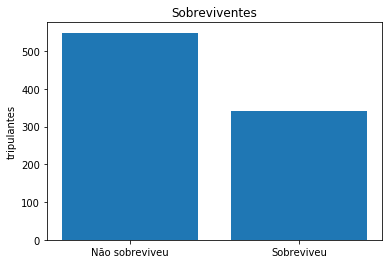

In [12]:
makebar(titadf['Survived'], ['Não sobreviveu', 'Sobreviveu'], 'Sobreviventes','tripulantes')

O gráfico e dados acima indicam a quantidade de pessoas que sobreviveram no navio. Imediatamento notamos que a maioria das pessoas dos dados fornecidos sobreviveram

#### Análise dos tripulantes a partir da idade:

In [13]:
titadf['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


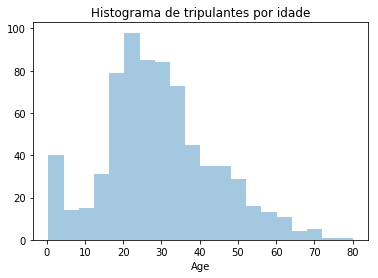

In [14]:
sns.distplot(titadf["Age"].dropna(), kde = False).set_title("Histograma de tripulantes por idade")
plt.show()

O histograma da uma ideia da variância de idades dos passageiros. Notamos que a um pico a esquerda que deve indicar uma quantidade de bebes e crianças depois um gráfico segue em padrão com um pico próximo a média de 29 anos seguindo depois em sentido decrescente até a idade máxima de 80 anos.

In [15]:
titadf.groupby(['faixa_etaria',]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
faixa_etaria,,,,,,,,,,,
criancas,77,77,77,77,77,77,77,77,77,77,77
adultos,573,573,573,573,573,573,573,573,573,573,572
idosos,64,64,64,64,64,64,64,64,64,64,63


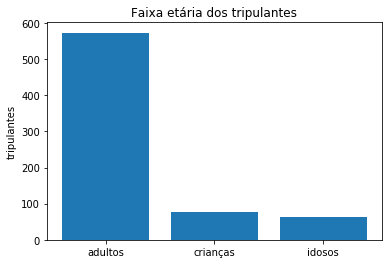

In [16]:
makebar(titadf['faixa_etaria'], ['adultos', 'crianças', 'idosos'], 'Faixa etária dos tripulantes','tripulantes')

#### Analisando tripulantes a partido do sexo:

In [17]:
titadf.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,faixa_etaria
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,312,261
male,577,577,577,577,453,577,577,577,577,577,453


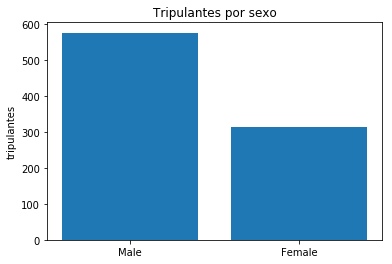

In [18]:
makebar(titadf['Sex'], ['Male', 'Female'], 'Tripulantes por sexo','tripulantes')

Gráfico acima mostra variação dos passageiros por sexo. Notamos que a maioria dos passageiros era do sexo masculino

#### Analisando tripulantes a partir do preço pago pela passagem e classe da cabine:

In [19]:
titadf['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

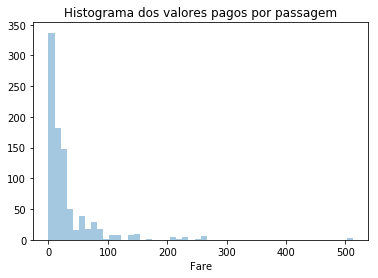

In [20]:
sns.distplot(titadf["Fare"], kde = False).set_title("Histograma dos valores pagos por passagem")
plt.show()

Text(0.5, 1.0, 'Boxplot dos valores pagos por passagem')

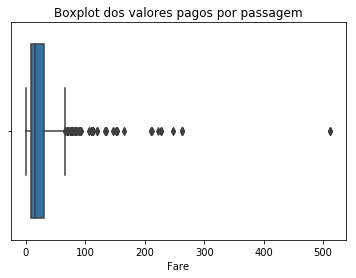

In [21]:
sns.boxplot(titadf['Fare']).set_title('Boxplot dos valores pagos por passagem')

O histrograma e gráfico de caixa acima demonstram o pico dos valores se aproxima da média de 32 dólares mas o elemento que fica explicito nos dois gráfico é o elevado valor do desvio padrão e o grande número de outiliers que são valores que se distanciam muito da média dos valores estando a mais de 2 desvios padrãos de distância da média. Este ponto pode indicar valores diferentes por cabine ou até mesmo preço de revenda diferentes, ou indicar que além da cabine poderia haver outros pacotes no navio que variavam o preço do ticket.

In [22]:
titadf.groupby('Pclass').count()['PassengerId']

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

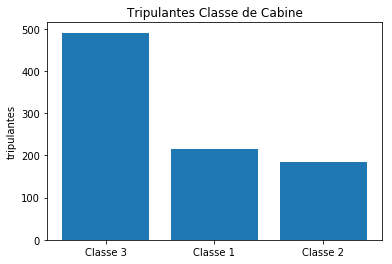

In [23]:
makebar(titadf['Pclass'], ['Classe 3', 'Classe 1', 'Classe 2'], 'Tripulantes Classe de Cabine','tripulantes')

O gráfico acima distribui os passageiros por cabines demonstrando que a maioria estava na teceira classe e que a quantidade de passageiros na classe 1 se aproxima da classe 2

#### análise dos tripulantes por local de embarque:

In [24]:
titadf.groupby('Embarked').count()['PassengerId']

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

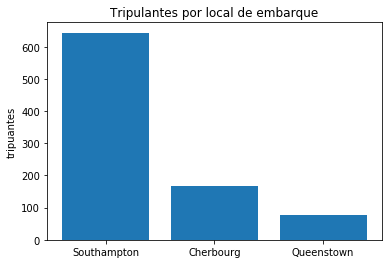

In [25]:
makebar(titadf['Embarked'], ['Southampton', 'Cherbourg', 'Queenstown'], 'Tripulantes por local de embarque','tripuantes')

O gráfico acima demonstra o passageiros distribuidos por cidade de embarque e notamos que a grande maioria dos passageiros embarcaram na cidade de Southamptom. 

#### Analisando dados dos sobreviventes:

In [26]:
titadfsurvived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


#### analisando dados dos sobreviventes por idade:

In [27]:
titadfsurvived['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

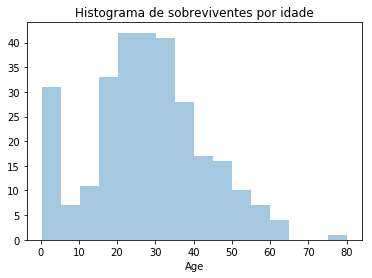

In [28]:
sns.distplot(titadfsurvived["Age"].dropna(), kde = False).set_title("Histograma de sobreviventes por idade")
plt.show()

Notamos no histograma de sobreviventes por idade em comparação com o histograma do passageiros que a barra à esquerda que indica as crianças teve um aumento proporicional e que o centro em torno da média ficou mais "grossa" e que o lado direito do gráfico que indicaria os idosos teve um descrencimento. Ainda é um gráfico muito similar mas as alterações nos inficam que há uma pequena tendência do aumento proporcional de crianças que vieram a sobreviver em contraposição ao número de idosos que veio a diminuir proporcionalmente.

In [29]:
titadfsurvived.groupby(['faixa_etaria',]).count()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
faixa_etaria,,,,,,,,,,,
criancas,45,45,45,45,45,45,45,45,45,45,45
adultos,223,223,223,223,223,223,223,223,223,223,222
idosos,22,22,22,22,22,22,22,22,22,22,21


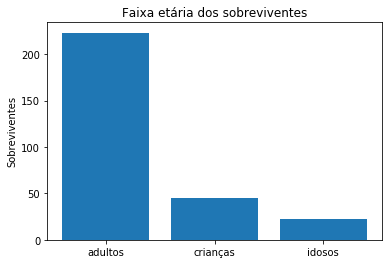

In [30]:
makebar(titadfsurvived['faixa_etaria'], ['adultos', 'crianças', 'idosos'], 'Faixa etária dos sobreviventes','Sobreviventes')


O gráfico acima indica a faixa etária dos sobreviventes e demosntra a mesma tendência observada no histograma

#### Analisando sobreviventes por sexo:

In [31]:
titadfsurvived.groupby(['Sex']).count()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,faixa_etaria
Sex,,,,,,,,,,,
female,233,233,233,233,197,233,233,233,233,231,197
male,109,109,109,109,93,109,109,109,109,109,93


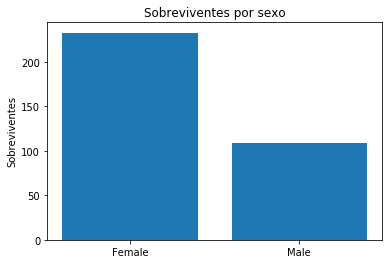

In [32]:
makebar(titadfsurvived['Sex'], ['Female', 'Male'], 'Sobreviventes por sexo','Sobreviventes')

O gráfico acima indica o sexo dos sobreviventes. Notamos que a relação se inverteu e que a maioria agora é feminina em contraposição ao gráfico dos passageiros aonde a maioria era masculina indicando que havia uma forte orientação no salvamento de mulheres

#### Analisando sobreviventes a partir do preço pago pela passagem e classe da cabine:

In [33]:
titadfsurvived['Fare'].describe()


count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

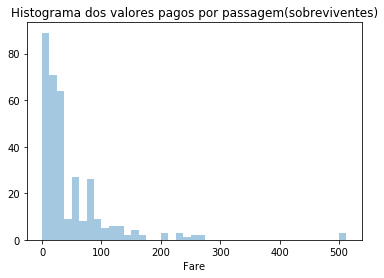

In [34]:
sns.distplot(titadfsurvived["Fare"], kde = False).set_title("Histograma dos valores pagos por passagem(sobreviventes)")
plt.show()

Text(0.5, 1.0, 'Boxplot dos valores pagos por passagem(sobreviventes)')

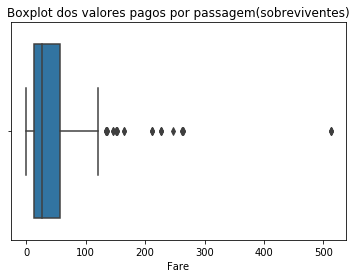

In [35]:
sns.boxplot(titadfsurvived['Fare']).set_title('Boxplot dos valores pagos por passagem(sobreviventes)')


O histograma indica a variação do valor pago pelo ticket dos sobrevientes. Em contrapoisção ao histograma dos passageiros podemos notar que a partir do valor 50 a um acrécimo de variação indicando que passageiros que pagaram mais pela passagem tinha uma tendência maior a sobrevivência

In [36]:
titadfsurvived.groupby('Pclass').count()['PassengerId']


Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64

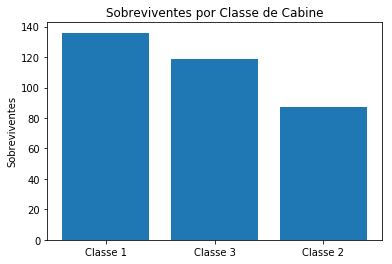

In [37]:
makebar(titadfsurvived['Pclass'], ['Classe 1', 'Classe 3', 'Classe 2'], 'Sobreviventes por Classe de Cabine','Sobreviventes')

O Gráfico acima indica a classe de cabines dos sobreviventes. Neste vimos que a classe 1 foi para primeiro lugar e a 2 cresceu proporcionalmente indicando que as primeiras classes teria prioridade para salvamento e que tinham maior chance de sobrevivência

#### Sobreviventes por local de embarque:

In [38]:
titadfsurvived.groupby('Embarked').count()['PassengerId']

Embarked
C     93
Q     30
S    217
Name: PassengerId, dtype: int64

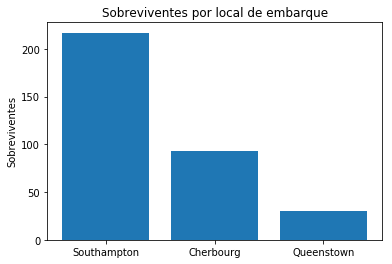

In [39]:
makebar(titadfsurvived['Embarked'], ['Southampton', 'Cherbourg', 'Queenstown'], 'Sobreviventes por local de embarque','Sobreviventes')

#### Qual a idade média dos sobreviventes da primeira classe que embarcaram em Cherbourg?

In [40]:
titadfsurvived[titadfsurvived.Embarked == 'C'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,93.000000,93.0,93.000000,79.000000,93.000000,93.000000,93.000000
mean,473.989247,1.0,1.634409,28.973671,0.494624,0.451613,79.720926
std,253.344348,0.0,0.882005,15.530733,0.601152,0.730041,99.582717
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,7.225000
25%,307.000000,1.0,1.000000,18.500000,0.000000,0.000000,19.258300
50%,485.000000,1.0,1.000000,27.000000,0.000000,0.000000,56.929200
75%,680.000000,1.0,3.000000,39.500000,1.000000,1.000000,89.104200
max,890.000000,1.0,3.000000,60.000000,2.000000,3.000000,512.329200


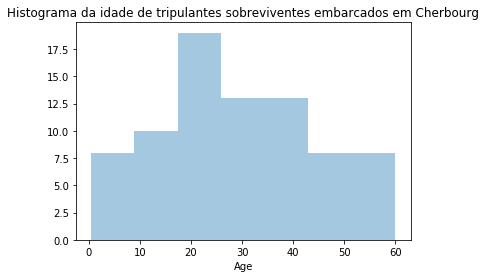

In [41]:
sns.distplot(titadfsurvived[titadfsurvived.Embarked == 'C']["Age"].dropna(), kde = False).set_title("Histograma da idade de tripulantes sobreviventes embarcados em Cherbourg")
plt.show()

#### Qual local de embarque teve mais sobreviventes proporcionalmente?


In [42]:
titadfsurvived.groupby('Embarked').count()['PassengerId']/titadf.groupby('Embarked').count()['PassengerId']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: PassengerId, dtype: float64

#### Qual classe teve maior número de sobreviventes proporcionalmente?


In [43]:
titadfsurvived.groupby('Pclass').count()['PassengerId']/titadf.groupby('Pclass').count()['PassengerId']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: PassengerId, dtype: float64

#### Qual sexo, idade e classe predominante daqueles que não sobreviveram?

In [44]:
titadfnsurvived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [45]:
titadfnsurvived.groupby('Sex').count()['PassengerId']

Sex
female     81
male      468
Name: PassengerId, dtype: int64

In [46]:
titadfnsurvived.groupby('Pclass').count()['PassengerId']

Pclass
1     80
2     97
3    372
Name: PassengerId, dtype: int64

In [47]:
titadfnsurvived['Age'].value_counts(bins=10)

(22.9, 30.2]    110
(15.6, 22.9]     99
(30.2, 37.5]     64
(37.5, 44.8]     45
(44.8, 52.1]     38
(0.926, 8.3]     18
(8.3, 15.6]      16
(52.1, 59.4]     15
(59.4, 66.7]     13
(66.7, 74.0]      6
Name: Age, dtype: int64

In [48]:
titadfnsurvived.groupby(['faixa_etaria']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
faixa_etaria,,,,,,,,,,,
criancas,32,32,32,32,32,32,32,32,32,32,32
adultos,350,350,350,350,350,350,350,350,350,350,350
idosos,42,42,42,42,42,42,42,42,42,42,42


## Análise:

Resumo da análise de nossos dados:

    - Dos 891 tripulantes do nosso banco de dados, apenas 342 sobreviveram o que representa 38,3%
    
    - A idade média dos tripulantes no navio era de 29 anos, destes 577 eram homens e 314 mulheres, representando respectivamente 64,7% e 35,2% dos tripulantes. 
    
    - Os embarques do titanic se deram por meio de 3 portos: C = Cherbourg, Q = Queenstown, S = Southampton , sendo que 168 tripulantes em embarcaram em C, 77 em Q e 644 em S.
    
    - Com relação ao preço por passagem temos uma média de 32,2 dólares mas os dados apresentar muitos outliers com um desvio padrão de 49,6 e valor máximo pago de 512 dólares. 
    
     - O tripulantes se dividiam dento do navio em 3 classes sendo a terceira classe 55,1% dos tripulantes, a segunda classe com 20,6% dos tripulantes e a primeira com 24,2% dos tripulantes.
    
 	 - A idade média dos sobreviventes é de 28,3. Dos que sobreviveram 68,1% eram mulheres e 30,9% eram homens. 
     
     - A média do valor pago por passagem pelos sobreviventes é de 48 dólares.  
     
     - com relação a classe do navio dos sobreviventes 62,9% dos sobreviventes eram da primeira classe, 47,2% da segunda clase e 24,2% da terceira classe.

## Resultados

    Dos elementos analisados podemos concluir que aparentemente a idade não foi um fator fundamental para sobrevivência visto que a diferença de média da tripulação e daqueles que sobreviveram é muito similar, alem dos gráfico da faixa etária dos sobrevientes ser muito similar ao gráfico de idade. Por outro lado podemos avaliar que sexo e classe social (indicado pela classe da cabine e pelo valor pago por passagem) foram elementos fundamentais para  a sobrevivência. O sexo predominante dos sobreviventes foi o feminino representando 68% contrastando com a população dos tripulantes aonde 64% eram homens. Em relação a classe social vimos que a maioria dos tripulantes se encontravam na terceira classe representando uma média de 55,1% dos tripulantes e com valor médio de passagem de 32 dólares  já nos sobreviventes a maioria era da primeira classe representando 62,9% do passageiros com preço médio do ticket aumentado para 48 dólares. 
    É importante ter em mente que as análises realizadas estão limitadas ao banco de dados fornecidos. Estes eram limitados a 891 entradas. Outro elemento é a falta de dados em algumas colunas como cabine e idade que limitam um pouco nossa análise, no caso da idade há a ausência de 177 entradas que podem nos levar a conclusões equivocadas sobre a importância da idade na sobrevivência. Uma melhor análise poderia ser feita com técnicas que ainda não domino como inferência usando modelos e machine learning. As informações detidas na coluna ticket poderia ser melhor aproveitadas caso tivessemos informações extras da localização de cada cabine no navio, de repente poderia haver uma co-relação entre a localização da cabine, pontos de inundação do navio e sobrevivência

## Bibliografia

https://pt.wikipedia.org/wiki/RMS_Titanic - link da wikipédia sobre Titanic
https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg - canal do youtube data school para lembrar e aprender como realizar alguns procedimentos em pandas.
https://www.youtube.com/channel/UCo-3_hRV1Zk2dyvcIReeyKg- Canal do youtube data science for all para aprender como vizualizar dados com seaborn.